# 01 - Velocity Field Generation

This notebook introduces the ScalarAdvectionAPI for building and inspecting synthetic velocity fields.

**Goals**
- Instantiate the high-level API
- Build Fourier-based velocity fields
- Explore spectra and compare with the wavelet-based generator

In [1]:
import sys, pathlib
project_root = pathlib.Path().resolve()
if not (project_root / 'scalar_advection').exists():
    for parent in project_root.parents:
        if (parent / 'scalar_advection').exists():
            project_root = parent
            break
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scalar_advection import (
    ScalarAdvectionAPI,
    VelocityConfig,
    generate_divfree_field,
)

## Generate a Fourier-based velocity field

In [4]:
api = ScalarAdvectionAPI(N=256, L=1.0)
vel_config = VelocityConfig(beta=5/3, urms=1.0, seed=8)
ux, uy = api.generate_velocity(vel_config)
ux.shape

(256, 256)

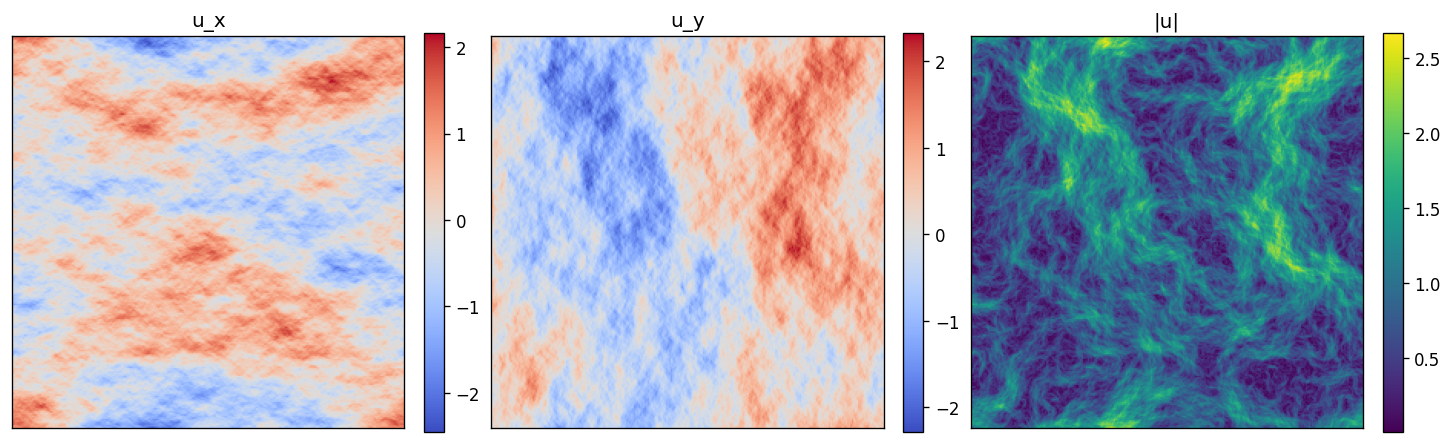

In [5]:
speed = np.hypot(ux, uy)
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=120, constrained_layout=True)
im0 = axs[0].imshow(ux, origin='lower', cmap='coolwarm')
axs[0].set_title('u_x')
plt.colorbar(im0, ax=axs[0], shrink=0.85)
im1 = axs[1].imshow(uy, origin='lower', cmap='coolwarm')
axs[1].set_title('u_y')
plt.colorbar(im1, ax=axs[1], shrink=0.85)
im2 = axs[2].imshow(speed, origin='lower', cmap='viridis')
axs[2].set_title('|u|')
plt.colorbar(im2, ax=axs[2], shrink=0.85)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## Inspect the kinetic energy spectrum

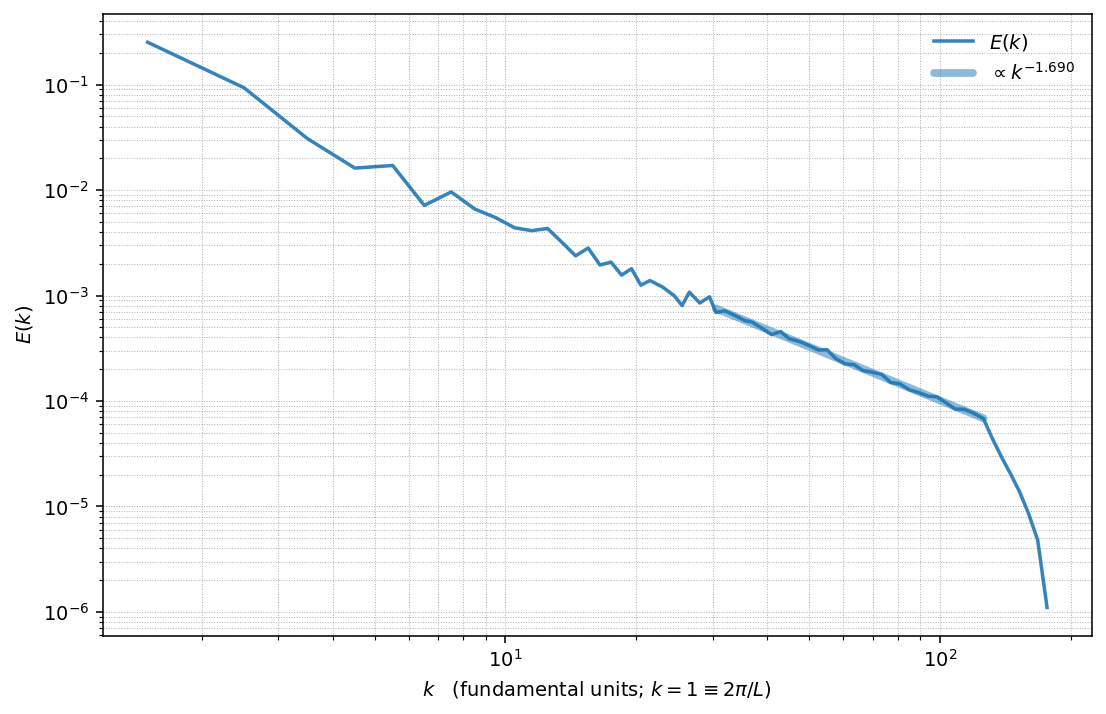

Total kinetic energy: 0.500


In [6]:
spec = api.velocity_spectrum(ux, uy, n_bins=64)
ScalarAdvectionAPI.plot_energy_spectrum(spec, fit_min_points=4, fit_min_decades=0.6)
print(f"Total kinetic energy: {spec['E_total']:.3f}")

## Generate a wavelet-based velocity field

In [14]:
ux_w, uy_w, speed_w = generate_divfree_field(
    N=256,
    lam_min=2,
    lam_max=256,
    slope=-5/3,
    wavelet='mexh',
    sparsity=0.0,
    seed=8,
)
ux_w.shape

(256, 256)

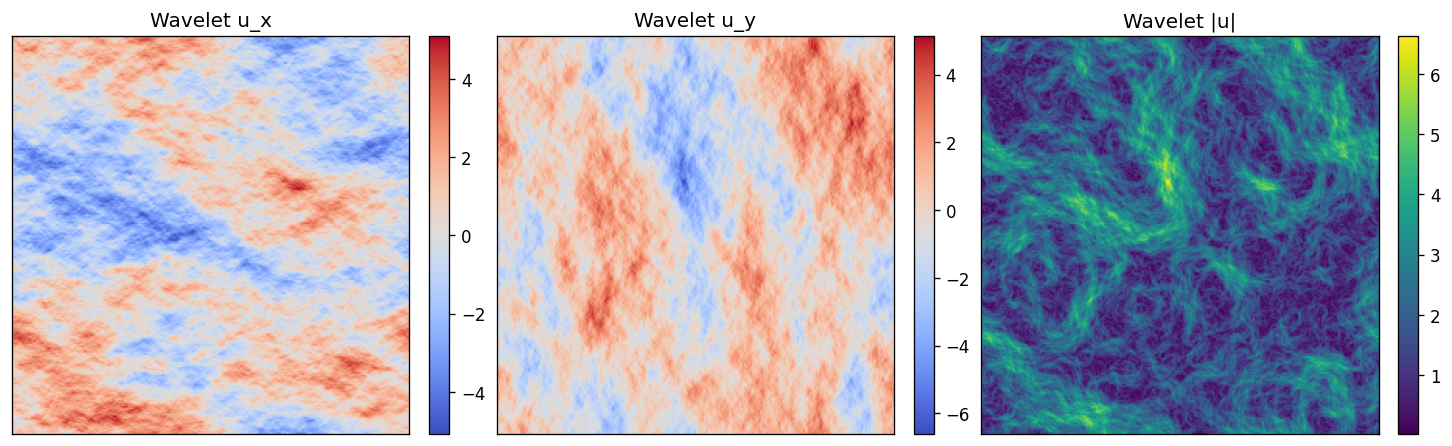

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=120, constrained_layout=True)
im0 = axs[0].imshow(ux_w, origin='lower', cmap='coolwarm')
axs[0].set_title('Wavelet u_x')
plt.colorbar(im0, ax=axs[0], shrink=0.85)
im1 = axs[1].imshow(uy_w, origin='lower', cmap='coolwarm')
axs[1].set_title('Wavelet u_y')
plt.colorbar(im1, ax=axs[1], shrink=0.85)
im2 = axs[2].imshow(speed_w, origin='lower', cmap='viridis')
axs[2].set_title('Wavelet |u|')
plt.colorbar(im2, ax=axs[2], shrink=0.85)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## Compare spectra

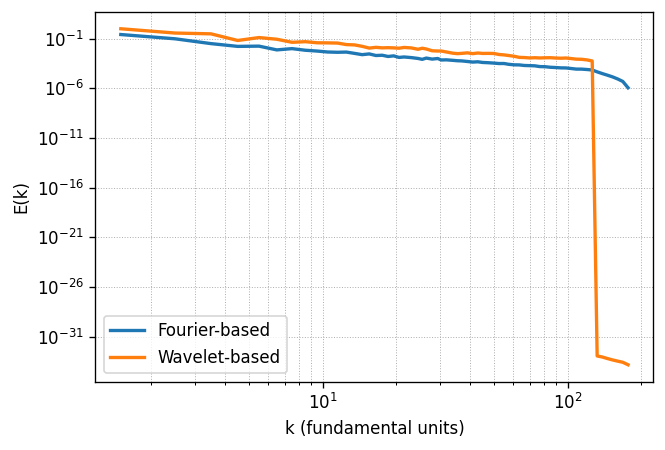

In [16]:
spec_wavelet = api.velocity_spectrum(ux_w, uy_w, n_bins=64)
plt.figure(figsize=(6, 4), dpi=120)
plt.loglog(spec['k'], spec['E'], label='Fourier-based', lw=2)
plt.loglog(spec_wavelet['k'], spec_wavelet['E'], label='Wavelet-based', lw=2)
plt.xlabel('k (fundamental units)')
plt.ylabel('E(k)')
plt.grid(True, which='both', ls=':', lw=0.6)
plt.legend()
plt.show()

The ScalarAdvectionAPI lets you swap between spectral and wavelet-driven velocity fields while reusing the same post-processing helpers.